<a href="https://colab.research.google.com/github/Anudivya-Geddada/Sentiment-analysis-on-Twitter-data/blob/main/Sentiment_Analysis_and_Topic_Modelling_on_Atmanirbhar_Bharat_Local_Vocalist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Extraction
Install snscrape library and import all the necessray
libraries

In [1]:
import pandas as pd

In [2]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.1 MB/s eta 0:00:00


In [3]:
import snscrape.modules.twitter as sntwitter

In [5]:
q='ATMANIRBHAR BHARAT ABHIYAN'
l=[]
for tweet in sntwitter.TwitterSearchScraper(q).get_items():
  if len(l)==500:
    break
  else:
    l.append(tweet.renderedContent)

In [6]:
print(*l)

Here are ....

1. Swachh Bharat Abhiyan ("Clean India")
2. Pradhan Mantri Kaushal Vikas Yojana (PMKVY)
3. Make in India
4. Jan Dhan Yojana
5. Mann Ki Baat
6. Ayushman Bharat
7. Digital India
8. Atmanirbhar Bharat
9. Trippal Talaq
10. Online Payments
11. Ujwala Yojana
13. Housing https://t.co/03MHVTXGLp The Atmanirbhar Bharat Abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation. #9YearsOfEaseOfBusiness https://t.co/0e7b2SbKPh The Atmanirbhar Bharat Abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation. #9YearsOfEaseOfBusiness https://t.co/cAAPikVbRH The Atmanirbhar Bharat Abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation. #9YearsOfEaseOfBusiness https://t.co/JdNB9X5JeW The remarkable progress of the Indian economy, under the leadership of Hon'ble PM Shri @narendramodi ji, can be attributed to his visionary Atmanirbhar Bharat Abhiyan, the digital payment revolution, and com

#Data Cleaning
As the Extracted is Noisy,So we need to perform Data Cleaning.

import clean-text library from python package

In [7]:
pip install clean-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=964a6d1e6b6d00c0bbce8cf124232d7a197dd0dc58efa287de30e4ac3e62b5ea
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


1.Remove emoji's from the raw data

In [8]:
from cleantext import clean
l2=[]
l2.append(clean(l, no_emoji=True))
print(*l2)

['here are ....
1. swachh bharat abhiyan ("clean india")
2. pradhan mantri kaushal vikas yojana (pmkvy)
3. make in india
4. jan dhan yojana
5. mann ki baat
6. ayushman bharat
7. digital india
8. atmanirbhar bharat
9. trippal talaq
10. online payments
11. ujwala yojana
13. housing https://t.co/03mhvtxglp', 'the atmanirbhar bharat abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation. #9yearsofeaseofbusiness https://t.co/0e7b2sbkph', 'the atmanirbhar bharat abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation. #9yearsofeaseofbusiness https://t.co/caapikvbrh', 'the atmanirbhar bharat abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation. #9yearsofeaseofbusiness https://t.co/jdnb9x5jew', "the remarkable progress of the indian economy, under the leadership of hon'ble pm shri @narendramodi ji, can be attributed to his visionary atmanirbhar bharat abhiyan, the digital payment revolu

2.Remove **Hashtags** and **URLs** using **regex** library

In [9]:
import re
l3=[]
for i in l2:
  i = re.sub("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|http\S+","",i)
  l3.append(i)
print(*l3)


['here are ....
1. swachh bharat abhiyan ("clean india")
2. pradhan mantri kaushal vikas yojana (pmkvy)
3. make in india
4. jan dhan yojana
5. mann ki baat
6. ayushman bharat
7. digital india
8. atmanirbhar bharat
9. trippal talaq
10. online payments
11. ujwala yojana
13. housing  'the atmanirbhar bharat abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation.   'the atmanirbhar bharat abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation.   'the atmanirbhar bharat abhiyan has encouraged self-reliance, fostering entrepreneurship and indigenous innovation.   "the remarkable progress of the indian economy, under the leadership of hon'ble pm shri  ji, can be attributed to his visionary atmanirbhar bharat abhiyan, the digital payment revolution, and comprehensive economic reforms.
  'and urban landscapes. the atmanirbhar bharat abhiyan, aimed at boosting domestic manufacturing and reducing dependence on imports, has sp

3.To remove **Stopwords** and **Punctuations** , we need to import **nltk** library and split the sentence into words using word_tokenization

In [10]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def remove_punctuation(sentence):
  for i in sentence:
    if i in string.punctuation:
      sentence = sentence.replace(i, "")
  return sentence
def remove_stopwords(sentence):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(example_sent)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return filtered_sentence
sp=[]
for i in l3:
  example_sent = remove_punctuation(i)
  example_sent = " ".join(remove_stopwords(example_sent))
  sp.append(example_sent)
print(*sp)



1 swachh bharat abhiyan clean india 2 pradhan mantri kaushal vikas yojana pmkvy 3 make india 4 jan dhan yojana 5 mann ki baat 6 ayushman bharat 7 digital india 8 atmanirbhar bharat 9 trippal talaq 10 online payments 11 ujwala yojana 13 housing atmanirbhar bharat abhiyan encouraged selfreliance fostering entrepreneurship indigenous innovation atmanirbhar bharat abhiyan encouraged selfreliance fostering entrepreneurship indigenous innovation atmanirbhar bharat abhiyan encouraged selfreliance fostering entrepreneurship indigenous innovation remarkable progress indian economy leadership honble pm shri ji attributed visionary atmanirbhar bharat abhiyan digital payment revolution comprehensive economic reforms urban landscapes atmanirbhar bharat abhiyan aimed boosting domestic manufacturing reducing dependence imports spurred innovation job creation economic resilience 6 dairy schemes dairy infrastructure development fund didf animal husbandry infrastructure development fund ahidf dahdnicins

In [12]:
sp1 = "".join(sp)
l1=sp1.split(" ")
print(l1)

['1', 'swachh', 'bharat', 'abhiyan', 'clean', 'india', '2', 'pradhan', 'mantri', 'kaushal', 'vikas', 'yojana', 'pmkvy', '3', 'make', 'india', '4', 'jan', 'dhan', 'yojana', '5', 'mann', 'ki', 'baat', '6', 'ayushman', 'bharat', '7', 'digital', 'india', '8', 'atmanirbhar', 'bharat', '9', 'trippal', 'talaq', '10', 'online', 'payments', '11', 'ujwala', 'yojana', '13', 'housing', 'atmanirbhar', 'bharat', 'abhiyan', 'encouraged', 'selfreliance', 'fostering', 'entrepreneurship', 'indigenous', 'innovation', 'atmanirbhar', 'bharat', 'abhiyan', 'encouraged', 'selfreliance', 'fostering', 'entrepreneurship', 'indigenous', 'innovation', 'atmanirbhar', 'bharat', 'abhiyan', 'encouraged', 'selfreliance', 'fostering', 'entrepreneurship', 'indigenous', 'innovation', 'remarkable', 'progress', 'indian', 'economy', 'leadership', 'honble', 'pm', 'shri', 'ji', 'attributed', 'visionary', 'atmanirbhar', 'bharat', 'abhiyan', 'digital', 'payment', 'revolution', 'comprehensive', 'economic', 'reforms', 'urban', 'la

#Sentiment Analysis

Install textblob to find the polarity of given text

In [13]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from textblob import TextBlob
pos=[]
neut=[]
neg=[]
posi=[]
negi=[]
neutr=[]
for i in l1:
  res = TextBlob(i).sentiment.polarity
  if(res > 0.10):
    pos.append(res)
    posi.append(i)
  elif(res>-0.10 and res<0.10):
    neut.append(res)
    neutr.append(i)
  elif(res<0.10):
    neg.append(res)
    negi.append(i)
print(pos)
print(neut)
print(neg)
print(len(pos))
print(len(neut))
print(len(neg))

[0.3666666666666667, 0.75, 0.2, 0.2, 0.25, 1.0, 0.4, 0.375, 0.13636363636363635, 0.7000000000000001, 0.3666666666666667, 0.2, 0.2, 0.8, 0.4, 0.5, 0.4, 0.5, 0.4, 0.4, 0.5, 0.25, 0.2, 0.5, 0.5, 0.2, 0.2, 0.6, 0.8, 0.375, 0.13636363636363635, 0.13636363636363635, 0.3, 0.4, 0.5, 0.8, 0.4333333333333333, 0.5, 0.4333333333333333, 0.5, 0.13636363636363635, 0.2, 0.4333333333333333, 0.9, 0.9, 0.5, 0.8, 0.5, 0.8, 0.5, 0.8, 0.13636363636363635, 0.4333333333333333, 0.43333333333333335, 0.25, 0.8, 0.4333333333333333, 0.375, 0.35714285714285715, 0.2, 0.2, 0.8]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [15]:
from statistics import mean
positive = mean(pos)
print(positive)
negative = mean(neg)
print(negative)
neutral = mean(neut)
print(neutral)

0.4467305543918447
-0.26666666666666666
-0.00011944051548011943


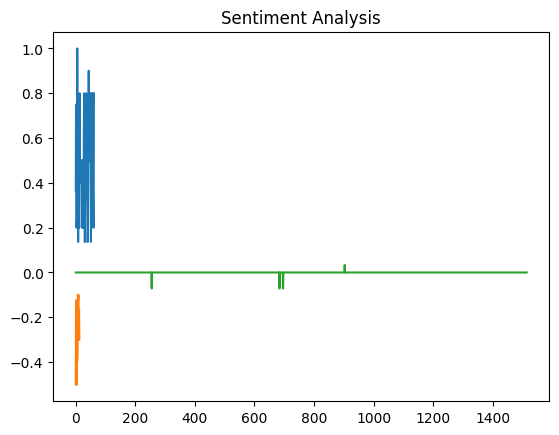

In [16]:
import matplotlib.pyplot as plt
plt.title('Sentiment Analysis')
plt.plot(pos)
plt.plot(neg)
plt.plot(neut)
plt.show()


**The total of positive polarity is higher than negative and neutral, so we can say that most of the opinions are positive about Atmanirbhar Bharat Scheme.**

#Topic Modelling

install spacy library to summarize the given text

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
punctuation = punctuation + '\n'
from heapq import nlargest
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')
def summ(text):
  doc = nlp(text)
  tokens = [token.text for token in doc]
  word_frequencies = {}
  for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
  max_frequency = max(word_frequencies.values())
  for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency
  sentence_tokens = [sent for sent in doc.sents]
  sentence_scores = {}
  for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
  select_length = int(len(sentence_tokens)*0.1)
  summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
  final_summary = [word.text for word in summary]
  summary = ' '.join(final_summary)
  print(summary)
p1=" ".join(posi)
p2=" ".join(negi)
p3=" ".join(neutr)
print(summ(p1))
print(summ(p2))
print(summ(p3))

proud live live notably important important celebrated celebrated new economic happy huge great happy many huge many great effectively much good new new new excellent excellent success memorable new new strong huge important top innovative in genious newinnovative in genious new better better better advance dadvanced good becoming proud special impressive success impressive success becoming best significant first newly firstfirstfirst advance dpotentki n d e con omic economich ighlywor  thnewne wablewholenewho nestlyabl eecon omicnewimportant new new new newunique important economic unique highly advanced good newnew confident unique highly newgreat new economicavailableeconomicavailableeconomicavailablehealthygreatrealsignificantlyeconomic firstlove  famous brilliant first outstanding first successappreciatedsuccessnewnewhahahahahahawinningworthymanybestinnovativemanyimportantwholewholenewwholesmartmostlyambitioussmartimportantimportantmanyinnovativecreativegrandsuccesskindrightkindlyavailablesurenewlikedcapableimportantbettermanymanymanymanymanywelcomestrongwelcomewelcomenewimportanteconomicwelcomeeconomiceconomiceconomiceconomiclivegoodeconomicgoodgoodeconomicgoodgoodeconomicgoodeconomicgoodeconomicgoodeconomicgoodeconomictoptopproudnewreadyworthnewfirstlovesuccessbestsuccessbelovedpowerfuladvancedfirstadvancedadvancedadvancedadvancedadvancedinterestedsuccesssmartfirstfirstcleanspecialimportantnewclearclear
agreesosupportuniformcivilcodeatmanirbharbharatabhiyanyoumissingignoringpointstatedevencoalcheaperoilcostimportalsocheaperreservesimpactedcomparativelybtwgotsollarpanelsyetbjpmovingaheadresolutionatmanirbharbharatabhiyanbjpmovingaheadresolutionatmanirbharbharatabhiyanfeelingseebjpmovingaheadresolutionatmanirbharbharatabhiyanbjpmovingaheadresolutionatmanirbharbharatabhiyancongraulationsawasthijiunderpmsvisioniffcordshatters5nanometerparticlesizenanuureacurrent20nanometersizemadeindiaatmanirbharbharatabhiyaniffcoindiaglobemakeinindianationallogisticssemiconductorpolicyweaponsaircraftdefenceindegenisationabhaschemeatmanirbharbharatschemeswachbharatabhiyandigitalindianationalsupercomputingmissionbroughtmughalsindia2022startreadingnewspapertwittercomanuragkukreti7atmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijicowbasedeconomysustainablewaymustcontributemrramkumarpalnationalexecutivememberatmanirbharbharatabhiyanyoutube2vpdssm32w4cowbasedeconomysustainablewaymustcontributemrramkumarpalnationalexecutivememberatmanirbharbharcreationpridehistoryculturetraditions7abolition370nationalintegrationjkgrowth8swrbharbharatabhiyaninventedmodijiatmanirbharbharatabhiyaninventedmodijiatmanirbharbharatabhiyaninventedmodijiatmanirbharbharatabhiyaninventedmodijiatmanirbharbharatabhiyaninventedmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiatmanirbharbharatabhiyanbroughtmodijiconvenedmeetingstatelevelcommitteememberstouristlodgedimapurtodayorganizeswachhbharatatmanirbharbharatabhiyanthroughoutstate17thsept2ndoct2022messageshridharmendrapradhanjimentionedunnatbharatabhiyanportraysstrengthpotentialcollegeuniversityprovideroadmapstrengthschannelizedmovecountrytowardsmakingatmanirbharbharatwhatspointwatchingwebsitegoogleearthshowseverythingevenminutedetailsdefenceinstallationscountryscommandalreadysoldbiggieswestgovtletsseeatmanirbharbharatabhiyangoesinsvikrantsampleatmanirbharbharatabhiyanachievementindiasurroundingareasaugust292022supertechtwintowersatmanirbharbharatabhiyanarthgangagovtjobdekhocomaugust29202229august2022supertechtwintowersatmanirbharbharatabhiyanearthgangauttarpradeshlivecom29august202229august2022supertechtwintowersatmanirbharbharatabhiyanarthgangabihardelegationcom29august2022pavewaycollaborationpresentwellfutureareasoperationtowardsatmanirbharbharatabhiyangovernmentindia22letsvocallocalsupportapplaudhonbleprimeministeratmanirbharbharatabhiyanpackagestrengthenindianeconomyultimateinfosftcomunnatbharatabhiyanconstantlyworkingtowardsachievementobjectiveatmanirbharbharatcontributiontowardsgoalcapacityrciorganizedtech4sevaregionalauspiciousoccasionindependencedayannounceresultsbenefitsatmanirbharbharatabhiyanschemealsodataincreasehouseholdtoiletcoverageuseincludinghealthcareenvironmentcleanlinessreducedpropertyreducedairpollutionatmanirbharbharatabhiyanvocallocal14batalionkeonjharkeyobjectivesselfreliantindiaatmanirbharbharatabhiyanmissionfollowsdevelopindiaglobalsupplychainhubbuildgovernmentstrustprivatesectorcapabilitiesprospects1nndcsradioatmanirbharbharatabhiyanvocallocalneedknowatmanirbharbharatabhiyanksgblogsatmanirbharbharatabhiyanreadksgindiacombloggyaankosachievementatmanirbharbharatabhiyanlineatmanirbharbharatabhiyanmanodarpanimplementedprovidepsychosocialsupportstudentsteachersfamilyamidcovid19wellbeingmakeindiaatmanirbharbharatabhiyantwoinitiativesspearheadedgovernmentseffortbringchangeindiasentrepreneurshipmindseteasingregulationsannouncinggrantsupcomingmsmespartatmanirbharbharatabhiyanvocallocalinitiativefoodprocessingsectorministryfoodprocessingindustriesreadindifoodbevcomlatestvocalftodaycorrectthatsnamocameatmanirbharbharatabhiyanprogramusedstandardpoliticalscamgetatmanirbharbharatabhiyanworkdonepresentgovernmentatalpensionyojanamudraloansatmanirbharbharatmakeindiaswachbharatabhiyanjandhanyojnamannkibaatdigitalindiafavouriteoneayushmanbharatkashmirissueresolvedskillindianeverendedlistatmanirbharbharatabhiyanexplainedlaymanstermscleariascomatmanirbharbhpersonalcontactprogramfacilitationcampaignatmanirbharbharatabhiyandated0502202209022022nyksdelhiinstagramcompcfmvymevja8personalcontactprogramfacilitationcampaignatmanirbharbharatabhiyandated0502202209022022nyksdelhiinstagramcompcfmvymevja8digitalfelicitationpreparecadrabankmitraprogramatmanirbharbharatabhiyannyksdelhiinstagramcompcfmoonavjwp1makeindia2swachhbharatabhiyan3jandhanyojana4policies5abrogationarticle3706mannkibaat7ayushmanbharat8digitalindia9atmanirbharbharat10controlcovid191makeindia2swachhbharatabhiyan3jandhanyojana4policies5abrogationarticle3706mannkibaat7ayushmanbharat8digitalindia9atmanirbharbharat10controlcovid19twittercomrvcjfbstatusshrisaidindiagetfullfledged5gservicesmar23saidtechnologycorenetwork5gservicesbbuiltindiawouldachievementcountrybigatmanirbharbharatabhiyanfpromotedesigndevelopmentmanufacturingairsportsequipmentindialineatmanirbharbharatabhiyanpleasedeclarebrandambassadoratmanirbharbharatabhiyanmakeindiaswacchtaabhiyanpmjdyatmanirbharbharatqualityroadsqualityinfraelectrifiedrailwaysvishwaguruimage8yearsbjpprovedgets70yrsindiawouldbecomeworldpowertwittercomincindiastatusinceonecamesupportextendedcleaninrldindiasorganicinorganicchemicalsaugmentexportgrowth106thrivingpmjisatmanirbharbharatabhiyanseetweetedtimescomshreekant26sorganizing2ndeditionideathonnationalinnovationpitchfest22towardsatmanirbharbharatabhiyangsmsmbagisctbitakenleadchallengeindiasmindspresentideasproofconceptsbusinessideasindiasbondingworldindiasorganicinorganicchemicalsaugmentexportgrowth106thrivingpmjisatmanirbharbharatabhiyanindiasbondingworldindiasorganicinorganicchemicalsaugmentexportgrowth106thrivingpmjisatmanirbharbharatabhiyangtuorganizing2ndeditionideathonnationalinnovationpitchfest22towardsatmanirbharbharatabhiyangsmsmbagisctbitakenleadchallengeindiasmindspresentideasproofconceptsbusinessideasatmanirbharbharatabhiyantwittercomtdhnairstaideathonnationalinnovationpitchfest2022nationalinnovationpitchfest22adheringatmanirbharbharatabhiyaninitiatedhonbleprimeministershrinarendrfollowusgivemechallengecomideathonnatioatmanirbharbharatabhiyankeyfactsobjectivesgeneralconceptdetailsuniquenewsonlinecomatmanirbharbhatmanirbharbharatabhiyangovernmentaimedlimitingimportdependenceincreasingdemandindigenousproductsprovidinggrowthopportunitiescompanymybsin2auj5dwatmanirbharbharatabhiyangovernmentaimedlimitingimportdependenceincreasingdemandindigenousproductsprovidinggrowthopportunitiescompanymybsin2auj5dwatmanirbharbharatabhiyangovernmentaimedlimitingimportdependenceincreasingdemandindigenousproductsprovidinggrowthopportunitiescompanymybsin2auj5dwsocialsecurityschemesmodiji1atmanirbharbharatabhiyan2missionkarmayogi3pradhanmantrisvanidhischeme4samarthscheme5savyashikshaabhiyaan6rashtriyagokulmission7productionlinkedincentiveplischeme1gatherideasresourcescreatesystems2runsystemsdriveprofitablebusiness3generateregularcashflowpumpindianeconomy4createcyclestepsinvolveatmanirbharbharatabhiyanrepeat2021pushatmanirbharbharatabhiyaninitiativethecentralgoveerateatmanirbharbharatabhiyangovernmentmustrevisitreducedutiestaxescapitalgoodsencourageenterprisesinvestproduceeconomictimesindiatimescomsmallbizsmetestimonyindiasspiritfaceadversityeconomyprojectedgrowratefiscalgoingcontractionlastyearshowsatmanirbharbharatabhiyanlaunchedyeartestimonyindiasspiritfaceadversityeconomyprojectedgrowratefiscalgoingcontractionlastyearshowsatmanirbharbharatabhiyanlaunchedyearreasidistjkwomenselfhelpgroupschampionsatmanirbharbharatabhiyanleadershippmjisgovtakenleadencouragingwomengostayingindoorsselfsufficientsupportlivelihoodstwittercomnews18dotcomspounitehsilreasidistjkwomenselfhelpgroupschampionsatmanirbharbharatabhiyanleadershiphonpmjisgovtakenleadmademarkrevivaltraditionalhandicraftssupportlivelihoodsrevivalhandicraftsreasiwomenselfhelpgroupschampionsatmanirbharbharatabhiyanhonpmjisgovtdistrictexampletwittercomdailyexcelsiorgoisatmanirbharbharatabhiyanindiasexportschinagrew342bilateraltradegrewrecord125bn2021givengrowthpotentialgoimusttakeissuechinaopenmarketsindiaspharmaceuticalproductscommittedatmanirbharbharatabhiyanprioritisedprocurementindianindustrytakenstepsleveragingintelligence5gquantumtechnologygainedgeadversariesplischemespartindiangovernmentsannouncementatmanirbharbharatabhiyandiversesectorsincludingprocessedfoodswhitegoodspharmaceuticalstwittercommygovindiastamantraalwaysindiapmmodiwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappappointedbrandambassadoratmanirbharbharatabhiyanimpacteligibilityatmanirbharbharatabhiyanhinditipsgeneralknowleiffcosnanoureaatmanirbharbharatabhiyansgiftworldtruelycompacttwittercomdrusawasthistwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappmantraalwaysindiapmmodiwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappmantraalwaysindiapmmodiwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappmantraalwaysindiapmmodiwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5womenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5womenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5womenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoa*ppwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappwomenselfhelpgroupschampionsatmanirbharbharatabhiyanpmmodinm4comuog8k5vianamoappmay2020government0yearsgovernanceatmanirbharbharatabhiyanvisionindiaswachabharatdigitalindiaskillindiaunnatbharatabhiyanmakeindiastartupindiaatmanirbharbharatstringinitiativesempoweringbharatindiagdcmarheenorganisesskillenhancementprogrammeatmanirbharbharatabhiyanlineatmanirbharbharatabhiyanmanodarpanimplementedprovidepsychosocialsupportstudentsteachersfamilyamidcovid19wellbeinggovtleadershippmshrijicleareddeckslongdelayedprocurement56airbusc295transportaircraftamong40manufacturedindia*
